## Calculate pi and dxy for the observed data
This assumes you have a directory full of fasta files, one for 
each species. 

### This is just for testing now. The official version is in `make_obs.py`

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter
from scipy.stats import entropy
import numpy as np
import math
import glob
import os

spider_dir = "/home/isaac/gimmeSAD/empirical_data/spider-fasta"
os.chdir(spider_dir)

In [14]:
abundances = "150	107	32	2	200	12	1	1042	2	471	228	2	69	38	1	3	8	374	204	19	6	6	387	263	65	17	4	3	27	62	3	29	343	72	10	84	18	5	7	9	4	26	28	6	1	121	16	9	54	123	10	210	65	35	128	33	239	5493"
abundances = map(int, abundances.split("\t"))
abundances.sort(reverse=True)
print(abundances)
print(entropy(abundances))

[5493, 1042, 471, 387, 374, 343, 263, 239, 228, 210, 204, 200, 150, 128, 123, 121, 107, 84, 72, 69, 65, 65, 62, 54, 38, 35, 33, 32, 29, 28, 27, 26, 19, 18, 17, 16, 12, 10, 10, 9, 9, 8, 7, 6, 6, 6, 5, 4, 4, 3, 3, 3, 2, 2, 2, 1, 1, 1]
2.24620615577


## Plot rank abundance

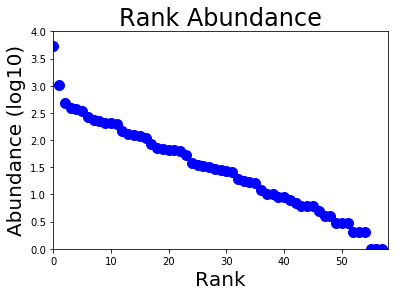

In [12]:
as_curve = False
if True:
    X = np.arange(0,len(abundances))
    if as_curve:
        Y = abundances
        plt.semilogy(X, Y, label="simulated")
        ymax = max(abundances)
    else:
        Y = np.log10(abundances)
        plt.scatter(X, Y, color="blue", s=100, label="simulated")
        ymax = int(math.ceil(np.log10(max(abundances))))

    plt.title("Rank Abundance", fontsize=24)
    plt.xlim(0, len(abundances))
    plt.ylim(0, ymax)
    plt.ylabel("Abundance (log10)", fontsize=20)
    plt.xlabel("Rank", fontsize=20)

In [8]:
def pi(file):
    ## Calculate average pi
    pi = 0
    len_seq = 0
    try:
        f = open(file).readlines()
        ## Get just the sequences
        dat = [list(x.strip()) for x in f if ">" not in x]
        len_seq = len(dat[0])

        ## Transpose, so now we have a list of lists of all bases at each
        ## position.
        dat = np.transpose(np.array(dat))

        ## for each position
        for d in dat:
            ## If the position is _not_ monomorphic
            if len(Counter(d)) > 1:
                ## Enumerate the possible comparisons and for each
                ## comparison calculate the number of pairwise differences,
                ## summing over all sites in the sequence.
                for c in combinations(Counter(d).values(), 2):
                    #print(c)
                    n = c[0] + c[1]
                    n_comparisons = float(n) * (n - 1) / 2
                    pi += float(c[0]) * (n-c[0]) / n_comparisons
    except Exception as inst:
        print("Something happenend - {}".format(inst))
        pi = 0
    ## Average over the length of the whole sequence.
    return pi/len_seq

In [10]:
files = glob.glob(os.path.join(spider_dir, "*.fasta"))
pis = []
for f in files:
    print(f), 
    print(pi(f))
    pis.append(pi(f))

/home/isaac/gimmeSAD/empirical_data/spider-fasta/GL-39.fasta 0.0212765957447
/home/isaac/gimmeSAD/empirical_data/spider-fasta/GL-30.fasta 0.00830143029958
/home/isaac/gimmeSAD/empirical_data/spider-fasta/GL-43.fasta 0
/home/isaac/gimmeSAD/empirical_data/spider-fasta/GL-10.fasta 0.0369230769231
/home/isaac/gimmeSAD/empirical_data/spider-fasta/GL-42.fasta 0.0070523415978
/home/isaac/gimmeSAD/empirical_data/spider-fasta/GL-51.fasta 0.000189969604863
/home/isaac/gimmeSAD/empirical_data/spider-fasta/GL-33.fasta 0.0048969942587
/home/isaac/gimmeSAD/empirical_data/spider-fasta/GL-32.fasta 0.00285342100366
/home/isaac/gimmeSAD/empirical_data/spider-fasta/GL-06.fasta 0.00325807829716
/home/isaac/gimmeSAD/empirical_data/spider-fasta/GL-20.fasta 0.00868055555556
/home/isaac/gimmeSAD/empirical_data/spider-fasta/GL-24.fasta 0.000923147934456
/home/isaac/gimmeSAD/empirical_data/spider-fasta/GL-45.fasta 0.0165224846076
/home/isaac/gimmeSAD/empirical_data/spider-fasta/GL-50.fasta 0.00460213160103
/hom

In [5]:
print(sorted(pis))
print(len(pis))

[0, 0, 0, 0, 0, 0, 0, 0, 0.00018996960486322188, 0.0002517940324814302, 0.0005555555555555556, 0.0007598784194528875, 0.0008557400046761748, 0.0009231479344564966, 0.000966183574879227, 0.0010131712259371832, 0.0011675423234092236, 0.001519756838905775, 0.001519756838905775, 0.0020164094006396888, 0.002135874476300008, 0.0022032781484227, 0.002300437083045779, 0.002336937565399372, 0.0024393198537509364, 0.0025551684088269454, 0.002853421003659824, 0.0030393335773165327, 0.003258078297161152, 0.0032949331747638244, 0.0034056712138903922, 0.003766765299023363, 0.004015658712767641, 0.004602131601026757, 0.004638742774096721, 0.0048969942586963855, 0.0054036363884719186, 0.006258111210941404, 0.0070523415977961435, 0.008301430299580163, 0.008680555555555554, 0.010638297872340425, 0.0110062893081761, 0.011125703334390787, 0.016522484607590992, 0.017512189823658986, 0.02089665653495441, 0.021276595744680844, 0.02161821630422097, 0.023246941966241903, 0.02608959428856512, 0.0277057119731997

## Make the 1D pi island vector

In [9]:
pi_island_bins = np.linspace(0, max(pis), 10)
heat = np.zeros(10, dtype=int)

for pi_island in pis:
        count_pi_island = 0
        try:
            while not pi_island <= pi_island_bins[count_pi_island]:
                count_pi_island += 1
                ## increment the heatmap point this corresponds to
            heat[count_pi_island] += 1
        except:
            pass
print(heat)

NameError: name 'pis' is not defined